## <center><ins>Trabajo Práctico 1: Reservas de Hotel</ins></center>
#### <center>*Checkpoint 1: Análisis Exploratorio y Preprocesamiento de Datos*</center>
##### <center>75.06 / 95.58 Organización de Datos - FIUBA</center>
##### <center>Ing. Rodríguez - 1°C 2023</center>
---
#### <center>**Grupo 31 - "Datazo":**</center>
<center> Michael Mena - 102685</center>
<center>Pablo Brocca - 104256</center>
<center>Diego Kisinovsky - 106203</center>

## Carga de datos

In [2]:
#Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

#Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

#Modelo Lineal
from sklearn.linear_model import LinearRegression

#Metricas para evaluar modelos
from sklearn import metrics

import scipy.stats as st

In [3]:
hotel = pd.read_csv('./dataset/hotels_train.csv')

## Exploración Inicial

In [4]:
hotel.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [5]:
columns = hotel.columns.tolist()
columns

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

In [6]:
print(hotel.dtypes)

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

In [7]:
hotel.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


In [8]:
hotel.select_dtypes(object).describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date,id
count,61913,61913,61913,61692,61913,61913,61913,61913,61913,61913,61913,61913
unique,2,12,5,149,8,5,10,12,3,4,915,61913
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2015-10-21,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689
freq,42129,7176,47837,27950,29269,51849,45134,40007,51685,47449,1013,1


#### Análisis de valores extraños

In [9]:
have_character_strange = hotel.astype(str).apply(lambda x: x.str.contains('[^a-zA-Z0-9_]').any())
have_character_strange

hotel                              True
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                           False
market_segment                     True
distribution_channel               True
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                       True
agent                              True
company                            True
days_in_waiting_list              False


##### Verificamos si hay algún tipo de hotel que no sea "Resort Hotel" o "City Hotel".

In [10]:
hotel[~hotel['hotel'].isin(['City Hotel','Resort Hotel'])]['hotel']

Series([], Name: hotel, dtype: object)

In [11]:
# Verificamos los valores únicos de las columnas
print (hotel['hotel'].unique())

['City Hotel' 'Resort Hotel']


Conclusion: No hay ningún tipo de hotel que no sea "Resort Hotel" o "City Hotel". El espacio en blanco fue tomado como un valor extraño.

##### Verificamos los valores extraños en 'market_segment' y 'distribution_channel'.

In [12]:
print (hotel['market_segment'].unique())

['Online TA' 'Groups' 'Offline TA/TO' 'Direct' 'Complementary' 'Corporate'
 'Aviation' 'Undefined']


In [13]:
print (hotel['distribution_channel'].unique())

['TA/TO' 'Direct' 'Corporate' 'GDS' 'Undefined']


Conclusion: El caracter '/' fue tomado como un valor extraño.

##### Verificamos valores que no tienen sentido en 'adults', 'adr'.

In [14]:
adults_value_zero = (hotel['adults'] == 0).sum()
print('Cantidad de adultos con valor 0: ' + str(adults_value_zero) + '\nRepresenta el ' + str(adults_value_zero/hotel.shape[0]*100) + '% del total de los datos')

Cantidad de adultos con valor 0: 197
Representa el 0.31818842569411915% del total de los datos


In [15]:
adr_value_zero = (hotel['adr'] == 0).sum()
print('Cantidad de adr con valor 0: ' + str(adr_value_zero) + '\nRepresenta el ' + str(adr_value_zero/hotel.shape[0]*100) + '% del total de los datos')

Cantidad de adr con valor 0: 884
Representa el 1.4278099914396007% del total de los datos


Conclusion: Como la cantidad de registros con valores igual a '0' es muy baja, se decidió eliminarlos.

In [16]:
hotel.shape

(61913, 32)

In [17]:
hotel.drop(hotel[hotel['adults'] == 0].index, inplace = True)
hotel.drop(hotel[hotel['adr'] == 0].index, inplace = True)
hotel.shape

(60898, 32)

## Visualización de los datos

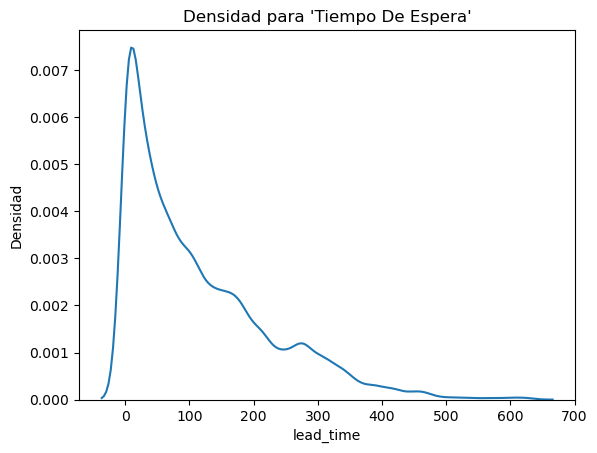

In [18]:
sns_hist=sns.kdeplot(data=hotel['lead_time']).set(title="Densidad para 'Tiempo De Espera'",xlabel="lead_time",ylabel="Densidad")

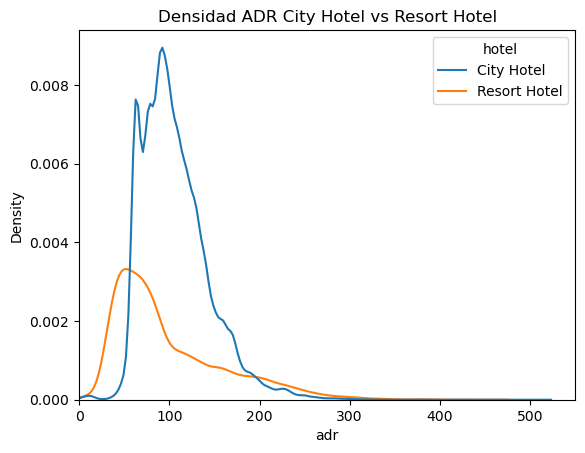

In [19]:
sns.kdeplot(hotel, x="adr", hue="hotel").set(title="Densidad ADR City Hotel vs Resort Hotel", xlim=(0, 550))
plt.show()

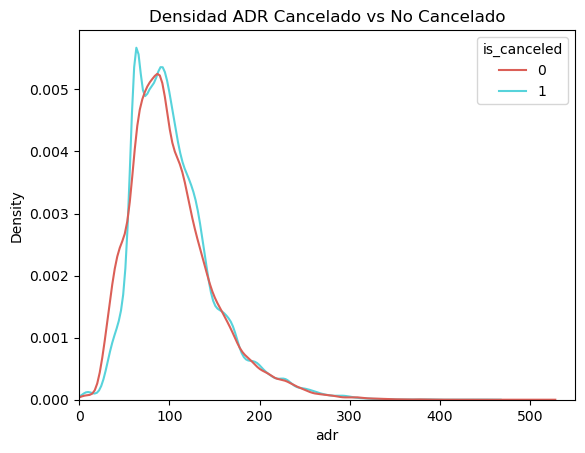

In [20]:
not_canceled = hotel.loc[hotel['is_canceled'] == 0]
canceled = hotel.loc[hotel['is_canceled'] == 1]
sns.kdeplot(hotel, x="adr", hue="is_canceled", palette="hls").set(title="Densidad ADR Cancelado vs No Cancelado", xlim=(0, 550))
plt.show()

C:\Users\Michael\AppData\Local\Temp\ipykernel_15704\2052693645.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hotel_work.corr(),annot=True).set(title="Matriz de correlación")


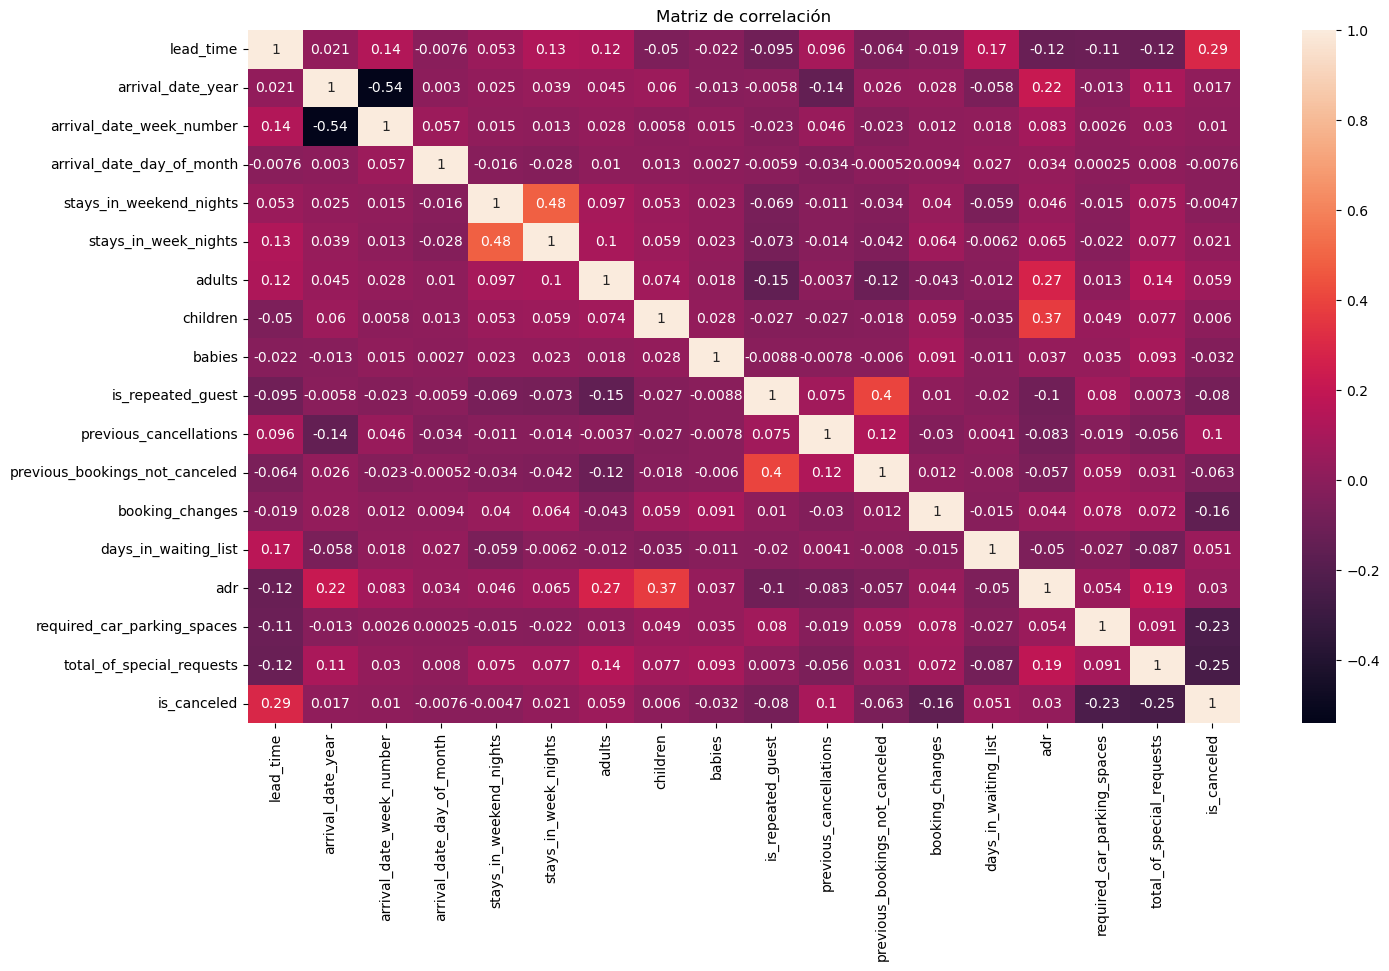

In [21]:
hotel_work = hotel.drop(['agent', 'company'], axis=1)
plt.figure(figsize = (16,9))
sns.heatmap(hotel_work.corr(),annot=True).set(title="Matriz de correlación")
plt.show()

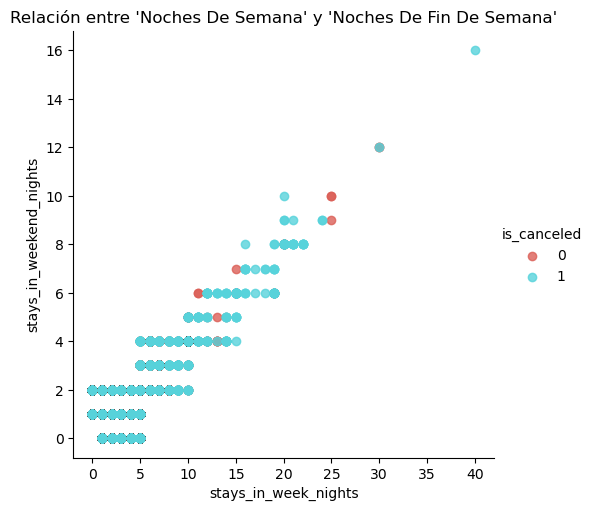

In [22]:
sns.lmplot(x='stays_in_week_nights', y='stays_in_weekend_nights', data=hotel, fit_reg=False, hue='is_canceled', legend=True, palette="hls").set(title="Relación entre 'Noches De Semana' y 'Noches De Fin De Semana'")

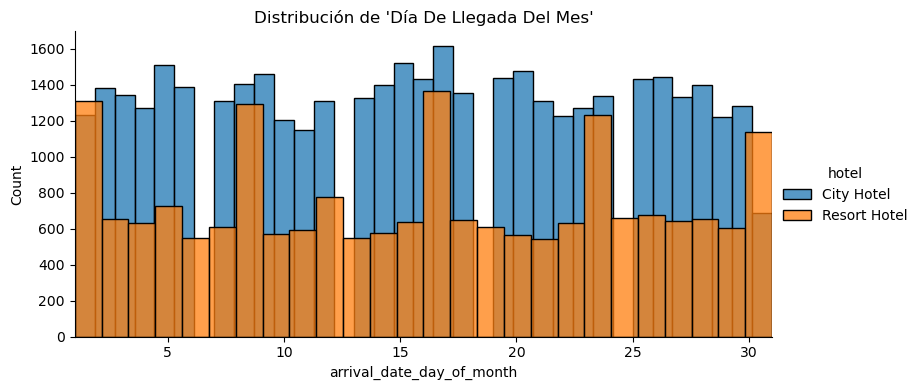

In [23]:
plot_day_of_month = sns.FacetGrid(hotel, hue="hotel", height=4, aspect=2).set(title="Distribución de 'Día De Llegada Del Mes'")
plot_day_of_month.map(sns.histplot, "arrival_date_day_of_month").add_legend()
plot_day_of_month.set(xlim=(1, 31))
plot_day_of_month.set_xlabels(label="arrival_date_day_of_month")
plt.show()

c:\Users\Michael\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


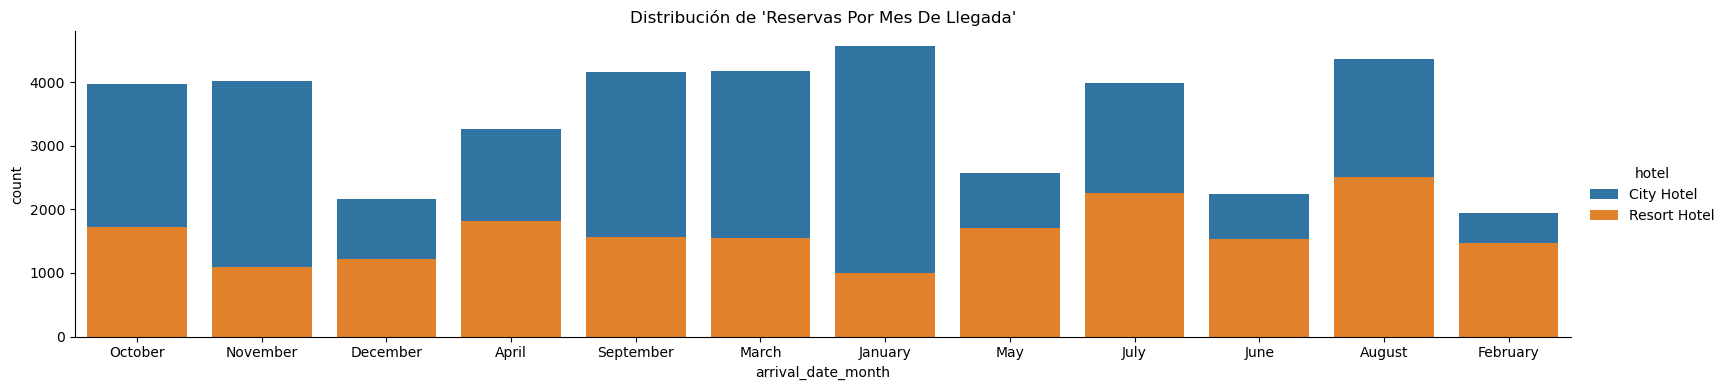

In [24]:
plot_month = sns.FacetGrid(hotel, hue="hotel", height = 4, aspect=4).set(title="Distribución de 'Reservas Por Mes De Llegada'")
plot_month.map(sns.countplot,"arrival_date_month").add_legend()
plot_month.set_xlabels(label="arrival_date_month")
plt.show()

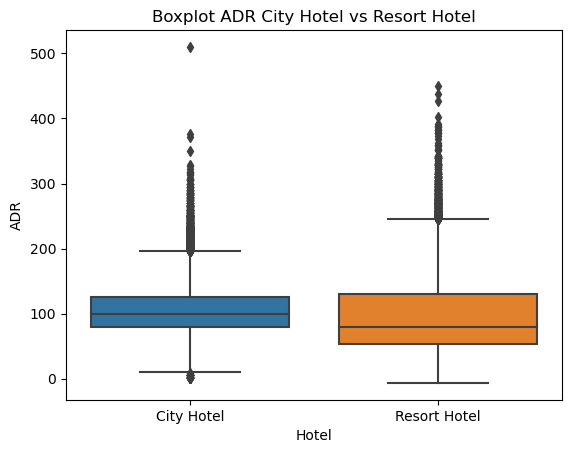

In [25]:
sns.boxplot(hotel, x="hotel", y="adr").set(title="Boxplot ADR City Hotel vs Resort Hotel", xlabel="Hotel", ylabel="ADR")
plt.show()

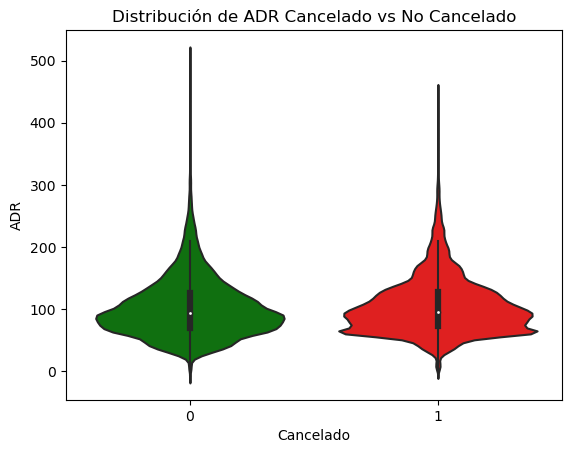

In [26]:
sns.violinplot(hotel, x="is_canceled", y="adr", palette=["g", "r"]).set(title="Distribución de ADR Cancelado vs No Cancelado", xlabel="Cancelado", ylabel="ADR")
plt.show()

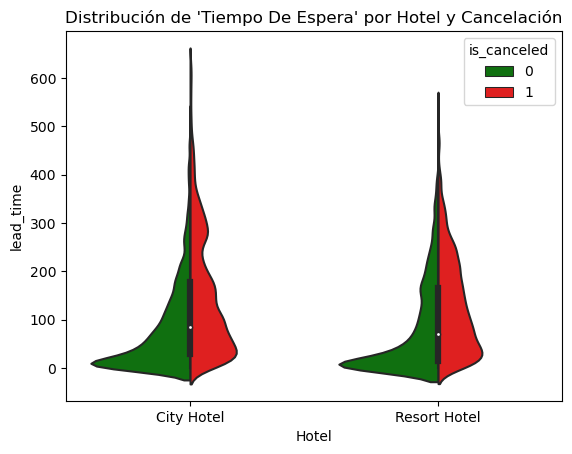

In [27]:
sns.violinplot(hotel, x="hotel", y="lead_time", hue="is_canceled", palette=["g", "r"], split=True).set(title="Distribución de 'Tiempo De Espera' por Hotel y Cancelación", xlabel="Hotel", ylabel="lead_time")
plt.show()

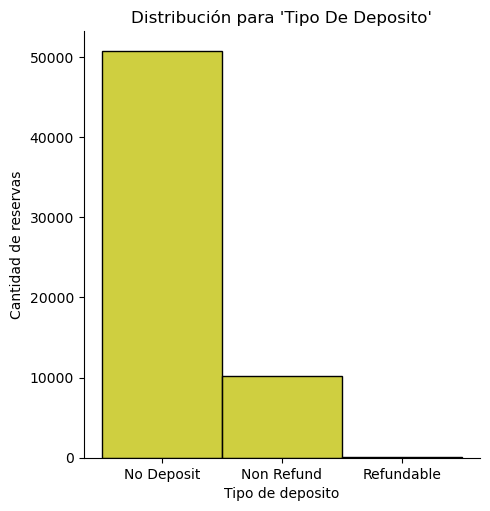

In [28]:
sns.displot(hotel["deposit_type"], color="y").set(title="Distribución para 'Tipo De Deposito'")
plt.xlabel("Tipo de deposito")
plt.ylabel("Cantidad de reservas")
plt.show()

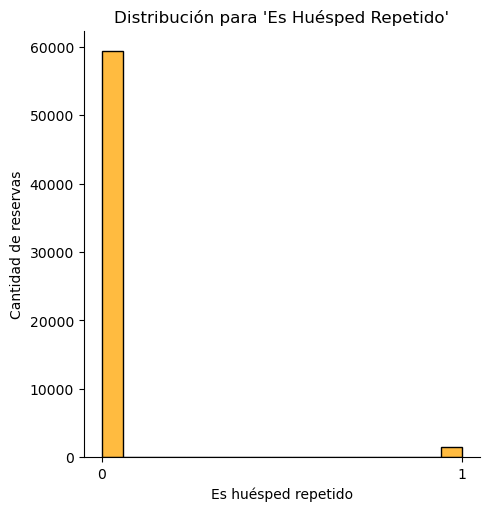

In [29]:
sns.displot(hotel["is_repeated_guest"], color="orange").set(title="Distribución para 'Es Huésped Repetido'")
plt.xticks([0, 1])
plt.xlabel("Es huésped repetido")
plt.ylabel("Cantidad de reservas")
plt.show()

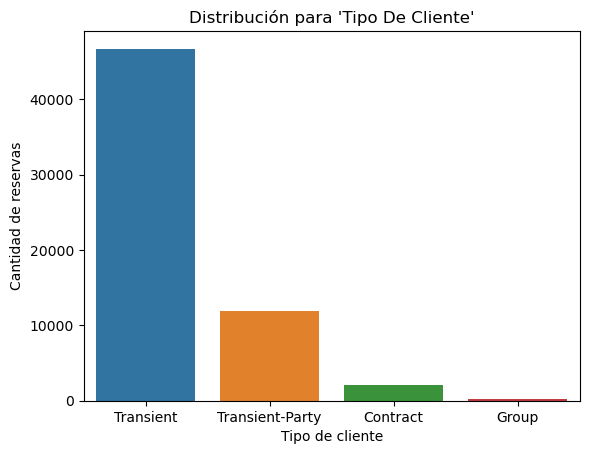

In [30]:
sns.countplot(x=hotel["customer_type"]).set(title="Distribución para 'Tipo De Cliente'")
plt.xlabel("Tipo de cliente")
plt.ylabel("Cantidad de reservas")
plt.show()

## Datos Faltantes

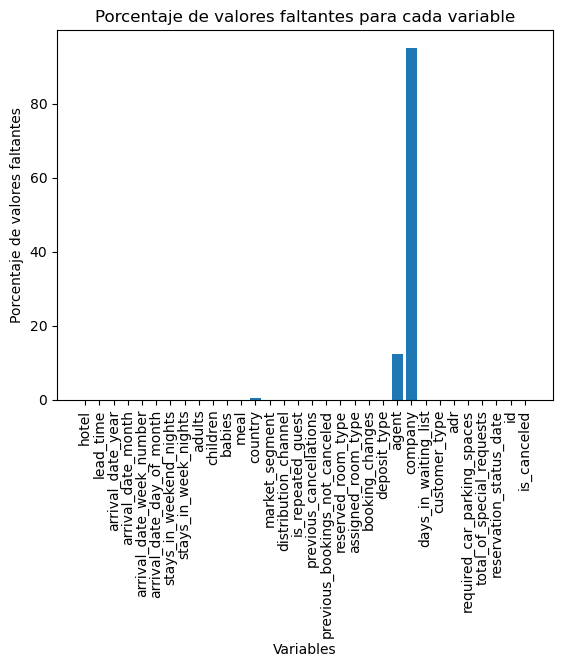

In [31]:
# Calculo el porcentaje de valores faltantes para cada variable
missing_percentages = hotel.isnull().sum() / len(hotel) * 100

# Creo un gráfico de barras para mostrar el porcentaje de valores faltantes
plt.bar(x=missing_percentages.index, height=missing_percentages)
plt.xticks(rotation=90)
plt.xlabel("Variables")
plt.ylabel("Porcentaje de valores faltantes")
plt.title("Porcentaje de valores faltantes para cada variable")
plt.show()

In [32]:
filas_totales = hotel.shape[0]
print(hotel.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006568
babies                             0.000000
meal                               0.000000
country                            0.348123
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

#### Análisis de los datos faltantes para 'country'

In [33]:
print(f"El porcentaje de valores faltantes en la variable country es: {hotel['country'].isna().sum()/filas_totales*100:.2f}%")
print(f"La cantidad de valores faltantes en la variable country es: {hotel['country'].isna().sum()}")

El porcentaje de valores faltantes en la variable country es: 0.35%
La cantidad de valores faltantes en la variable country es: 212


In [34]:
# Paises con menos de 1000 registros, que voy a filtrar en el grafico
country_counts = hotel['country'].value_counts()
less_than_100 = country_counts[country_counts < 1000]
print(less_than_100)

NLD    971
CHE    839
CN     594
AUT    575
CHN    543
      ... 
HND      1
FJI      1
LIE      1
ATA      1
RWA      1
Name: country, Length: 139, dtype: int64


In [35]:
hotel['country'].value_counts()

PRT    27213
GBR     5688
FRA     4770
ESP     4173
DEU     3292
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

In [36]:
print(f"El pais con mayor cantidad de registros es: {hotel['country'].value_counts().index[0]}")

El pais con mayor cantidad de registros es: PRT


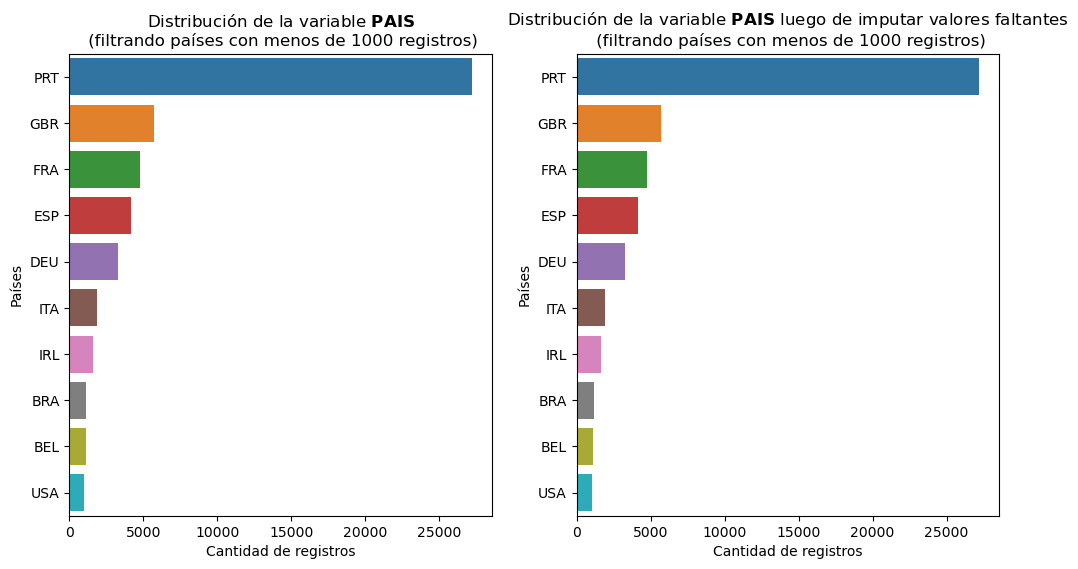

In [37]:
# Filtro de países con más de 1000 registros
hotel_filter = hotel['country'].value_counts() > 1000
hotel_country_filter = hotel.loc[hotel['country'].isin(hotel_filter[hotel_filter].index)]

# Gráfico previo
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

plt.sca(axes[0])
sns.countplot(y=hotel_country_filter['country'],
              order=hotel_country_filter['country'].value_counts().index)
plt.title(r'Distribución de la variable' + ' ' + r'$\bf{PAIS}$' + '\n (filtrando países con menos de 1000 registros)')
plt.xlabel("Cantidad de registros")
plt.ylabel("Países")

# Relleno los valores faltantes con el valor más frecuente
hotel['country'] = hotel['country'].fillna(hotel['country'].mode()[0])

# Gráfico posterior
plt.sca(axes[1])
sns.countplot(y=hotel_country_filter['country'], order=hotel_country_filter['country'].value_counts().index)
plt.title(r'Distribución de la variable' + ' ' + r'$\bf{PAIS}$' + ' luego de imputar valores faltantes' +'\n (filtrando países con menos de 1000 registros)')
plt.xlabel("Cantidad de registros")
plt.ylabel("Países")

plt.show()

#### Análisis de los datos faltantes para 'agent'

In [38]:
print(f"El porcentaje de valores faltantes en la variable agent es: {hotel['agent'].isna().sum()/filas_totales*100:.2f}%")
print(f"La cantidad de valores faltantes en la variable agent es: {hotel['agent'].isna().sum()}")

El porcentaje de valores faltantes en la variable agent es: 12.24%
La cantidad de valores faltantes en la variable agent es: 7453


In [39]:
hotel['agent'].value_counts()

9.0      16857
240.0     7326
1.0       4374
14.0      1684
6.0       1611
         ...  
247.0        1
197.0        1
301.0        1
352.0        1
25.0         1
Name: agent, Length: 295, dtype: int64

In [40]:
print(f"Cantidad de registro de agent con valor igual a 0: {hotel[hotel['agent'] == 0].shape[0]}")

Cantidad de registro de agent con valor igual a 0: 0


Como no hay registros con valor '0' en 'agent', se decide reemplazar los valores faltantes por '0' indicando que no se utilizó un agente de viajes.

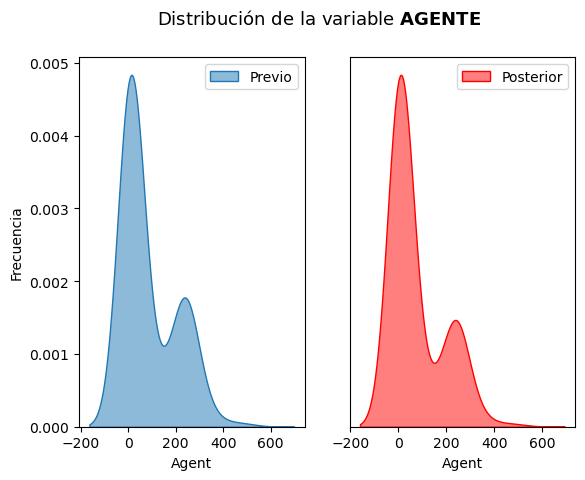

In [41]:
fig, ax = plt.subplots(1, 2)

# Histograma de distribución previa
sns.kdeplot(hotel['agent'].dropna(), bw_method=0.5, fill=True, alpha=0.5, label = 'Previo', ax=ax[0])

# 'agent' se completa con el valor 0 para indicar que no se utilizó un agente
hotel['agent'] = hotel['agent'].fillna(0)

# Histograma de distribución posterior
sns.kdeplot(hotel['agent'].dropna(), bw_method=0.5, fill=True, alpha=0.5, label = 'Posterior', ax=ax[1], color='red')

ax[0].set_xlabel('Agent')
ax[0].set_ylabel('Frecuencia')
ax[1].set_xlabel('Agent')
ax[1].set_ylabel('')
ax[1].set_yticks([]) # Elimina los ticks del eje y del histograma posterior
ax[0].legend()
ax[1].legend()

fig.suptitle('Distribución de la variable ' + r'$\bf{AGENTE}$', fontsize=13)

plt.show()

#### Análisis de los datos faltantes para 'children'

In [42]:
print(f"El porcentaje de valores faltantes en la variable company es: {hotel['children'].isna().sum()/filas_totales*100:.2f}%")
print(f"La cantidad de valores faltantes en la variable company es: {hotel['children'].isna().sum()}")

El porcentaje de valores faltantes en la variable company es: 0.01%
La cantidad de valores faltantes en la variable company es: 4


La distribución de children posterior a la imputación de los valores faltantes sera similar a la distribución original.

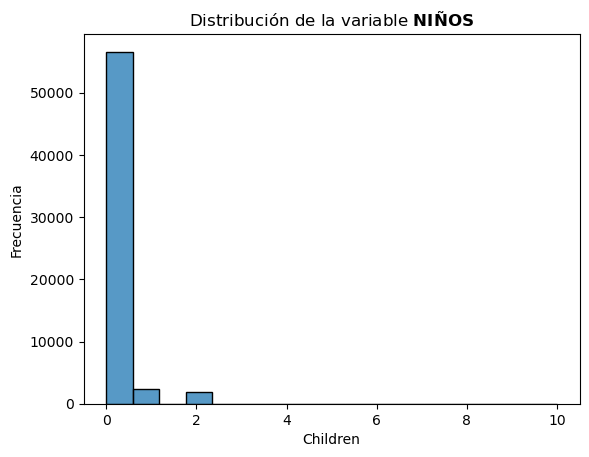

In [43]:
sns.histplot(hotel['children'].dropna()).set(title=r'Distribución de la variable ' + r'$\bf{NIÑOS}$')
plt.xlabel('Children')
plt.ylabel('Frecuencia')
plt.show()

In [44]:
hotel['children'].value_counts()

0.0     56599
1.0      2432
2.0      1827
3.0        35
10.0        1
Name: children, dtype: int64

In [45]:
print(f"La desviación estándar de la variable 'children' es {hotel['children'].std()}")

La desviación estándar de la variable 'children' es 0.39547170513918145


In [46]:
# Reemplazo los valores faltantes por 0 que es la moda
hotel['children'].fillna(0,inplace=True)

# Después de imputar los valores faltantes, convierto la variable a entero ya que no tiene sentido que sea float
hotel['children'] = hotel['children'].astype(int)

In [47]:
hotel['children'].value_counts()

0     56603
1      2432
2      1827
3        35
10        1
Name: children, dtype: int64

In [48]:
print(f"La desviación estándar de la variable 'children' después de imputar los valores faltantes es {hotel['children'].std()}")

La desviación estándar de la variable 'children' después de imputar los valores faltantes es 0.3954595778589308


#### Eliminación de variables

In [49]:
hotel.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date',
 'id',
 'is_canceled']

In [50]:
# Se elimina la variable 'company' ya que tiene el 94% de valores faltantes
hotel = hotel.drop('company',axis=1)

In [51]:
# Se eliminan las variables 'reservation_status' y 'reservation_status_date' ya que no aportan información relevante para el análisis.
# hotel = hotel.drop('reservation_status',axis=1)
hotel = hotel.drop('reservation_status_date',axis=1)

#### Generación de variables

In [52]:
# Generamos la variable stays_in_nights para unificar stays_in_week_nights y stays_in_weekend_nights
hotel["stays_in_nights"] = hotel["stays_in_week_nights"] + hotel["stays_in_weekend_nights"]
hotel[["stays_in_week_nights", "stays_in_weekend_nights", "stays_in_nights"]].head(10)

,stays_in_week_nights,stays_in_weekend_nights,stays_in_nights
0,2,1,3
1,1,0,1
2,1,0,1
3,5,2,7
4,5,2,7
5,5,3,8
6,9,4,13
7,1,2,3
8,2,2,4
9,1,0,1


In [53]:
# Generamos la variable total_of_guests para tener un total entre adults, children y babies
hotel["total_of_guests"] = hotel["adults"] + hotel["children"] + hotel["babies"]
hotel[["adults", "children", "babies", "total_of_guests"]].head(10)

,adults,children,babies,total_of_guests
0,1,0,0,1
1,2,0,0,2
2,2,2,0,4
3,2,0,0,2
4,2,0,0,2
5,1,0,0,1
6,2,0,0,2
7,2,0,0,2
8,2,0,0,2
9,2,0,0,2


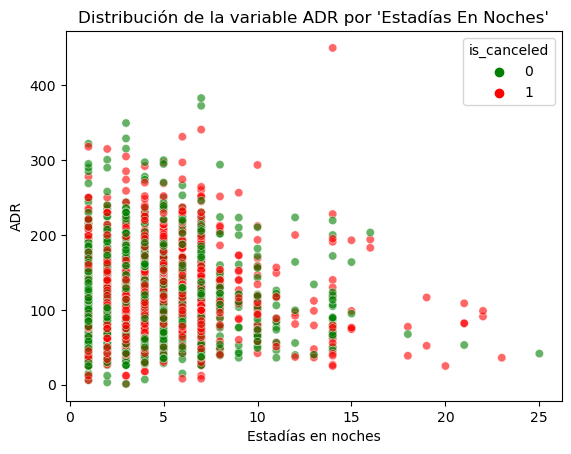

In [54]:
# Graficamos el adr contra la nueva variable stays_in_nights para una muestra de 5000

sns.scatterplot(data=hotel.sample(5000), x="stays_in_nights", y="adr", alpha=0.6, hue="is_canceled", palette=["g","r"]).set(title=r"Distribución de la variable ADR por 'Estadías En Noches'")
plt.xlabel('Estadías en noches')
plt.ylabel('ADR')

plt.show()

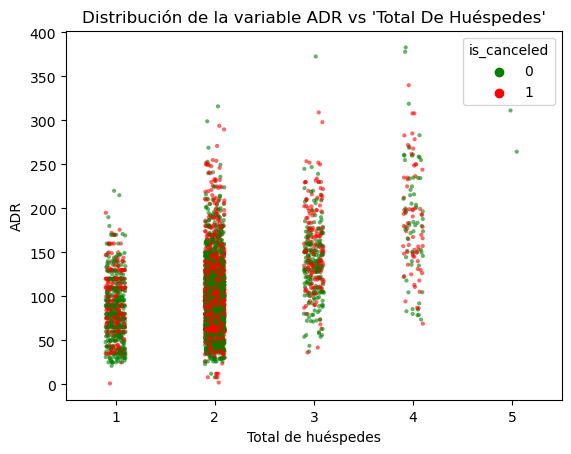

In [55]:
# Graficamos el adr contra la nueva variable total_of_guests para una muestra de 4000

sns.stripplot(data=hotel.sample(4000), x="total_of_guests", y="adr", alpha=0.6, size=3, hue="is_canceled", palette=["g","r"]).set(title=r"Distribución de la variable ADR vs 'Total De Huéspedes'")

plt.xlabel('Total de huéspedes')
plt.ylabel('ADR')

plt.show()

## Valores atípicos

#### Análisis de valores negativos

In [56]:
numeric_cols = hotel.select_dtypes(include=np.number)
any_negative = numeric_cols.apply(lambda x: np.any(x < 0))
print(any_negative)

lead_time                         False
arrival_date_year                 False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
booking_changes                   False
agent                             False
days_in_waiting_list              False
adr                                True
required_car_parking_spaces       False
total_of_special_requests         False
is_canceled                       False
stays_in_nights                   False
total_of_guests                   False
dtype: bool


In [57]:
print(hotel['adr'].size)

60898


In [58]:
adr_negative = hotel.loc[hotel['adr'] < 0, 'adr']
print('Cantidad de registros con ADR negativo: ', adr_negative.size)
print('El registro con ADR negativo es: ', adr_negative)

Cantidad de registros con ADR negativo:  1
El registro con ADR negativo es:  21124   -6.38
Name: adr, dtype: float64


In [59]:
# Se eliminan los registros con ADR negativo
hotel = hotel.loc[hotel['adr'] >= 0, :]

In [60]:
print(hotel['adr'].size)

60897


#### Analisis de la variable 'days_in_waiting_list'

In [61]:
id_max_days_waiting_list = hotel['days_in_waiting_list'].idxmax()
hotel.loc[id_max_days_waiting_list]

hotel                                                       City Hotel
lead_time                                                          443
arrival_date_year                                                 2016
arrival_date_month                                             October
arrival_date_week_number                                            41
arrival_date_day_of_month                                            7
stays_in_weekend_nights                                              0
stays_in_week_nights                                                 2
adults                                                               2
children                                                             0
babies                                                               0
meal                                                                BB
country                                                            PRT
market_segment                                                  Groups
distri

In [62]:
precio_days_in_waiting_list = hotel.groupby('is_canceled')['days_in_waiting_list'].max().reset_index()
precio_days_in_waiting_list.head()

,is_canceled,days_in_waiting_list
0,0,379
1,1,391


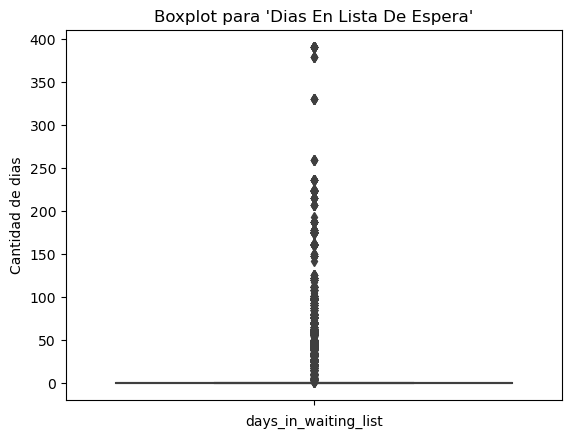

In [63]:
sns.boxplot(y=hotel.days_in_waiting_list).set(title="Boxplot para 'Dias En Lista De Espera'", xlabel="days_in_waiting_list", ylabel="Cantidad de dias")
plt.show()

In [64]:
Q1_peso=np.quantile(hotel.days_in_waiting_list,0.25)
Q3_peso=np.quantile(hotel.days_in_waiting_list,0.75)

#Rango intercuartil
IQR_peso=Q3_peso-Q1_peso

#Limite superior Outliers
out_sup=Q3_peso+3*IQR_peso
out_inf=Q1_peso-3*IQR_peso
print(out_inf)
print(out_sup)

0.0
0.0


In [65]:
# Conteo de outliers
outliers = hotel[(hotel['days_in_waiting_list'] < out_inf) | (hotel['days_in_waiting_list'] > out_sup)]
cantidad_outliers = outliers.shape[0]
print("Cantidad de outliers: ", cantidad_outliers)
# 3.6% de los datos son outliers en la variable days_in_waiting_list

Cantidad de outliers:  2220


In [66]:
# z-score days_in_waiting_list
# Creo un nuevo dataframe con la variable days_in_waiting_list
hotel_days_in_waiting_list = hotel['days_in_waiting_list'].to_frame()
hotel_days_in_waiting_list['zscore'] = st.zscore(hotel_days_in_waiting_list)
hotel_days_in_waiting_list.head()

,days_in_waiting_list,zscore
0,0,-0.142274
1,0,-0.142274
2,0,-0.142274
3,0,-0.142274
4,0,-0.142274


In [67]:
hotel_days_in_waiting_list[hotel_days_in_waiting_list['zscore'] > 3]

,days_in_waiting_list,zscore
11,162,8.514446
52,91,4.720452
76,93,4.827325
155,60,3.063919
206,77,3.972340
...,...,...
61751,68,3.491411
61757,62,3.170792
61797,259,13.697791
61805,178,9.369431


In [68]:
hotel_days_in_waiting_list[hotel_days_in_waiting_list['zscore'] < -3]

,days_in_waiting_list,zscore


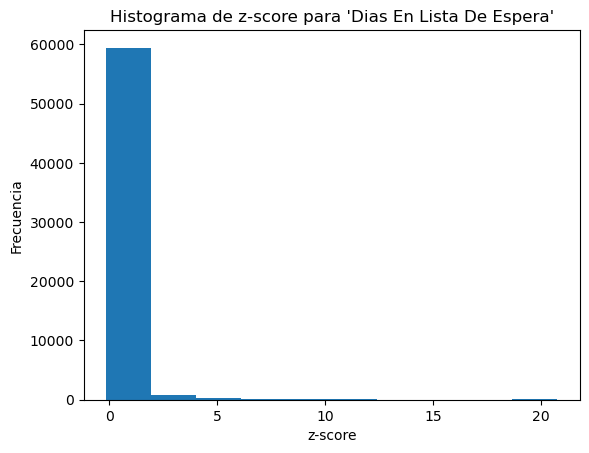

In [69]:
plt.hist(hotel_days_in_waiting_list['zscore'])
plt.title("Histograma de z-score para 'Dias En Lista De Espera'")
plt.xlabel('z-score')
plt.ylabel('Frecuencia')
plt.show()

Justificación: Se decide eliminar los registros con 'days_in_waiting_list' > 300 ya que la distribución de esta variable es muy sesgada y no aporta información relevante.

In [70]:
hotel_filter = hotel[hotel.days_in_waiting_list > 300]
hotel_filter.shape

(45, 32)

In [71]:
hotel.shape

(60897, 32)

In [72]:
hotel.drop(hotel[hotel.days_in_waiting_list > 300].index, inplace=True)
hotel.shape

(60852, 32)

### Analisis multivariado

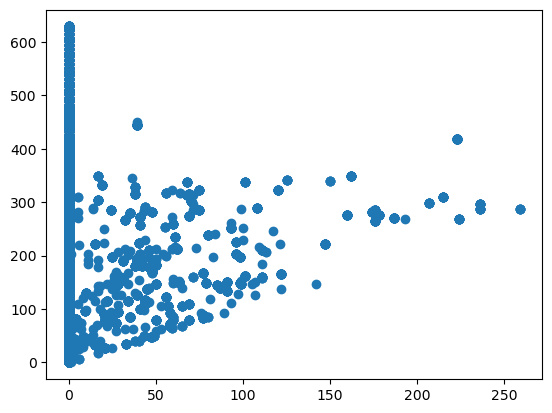

In [73]:
plt.scatter(hotel['days_in_waiting_list'], hotel['lead_time'])
plt.show()

Revisamos si existe algún registro cuyas estadías en noches de fin de semana no tengan sentido respecto de las estadías en noches de semana. Se asume que una sola reserva de hotel es en días corridos y que una estadía puede darse sin pasar la noche en el hotel, dejando a ambas variables en 0.

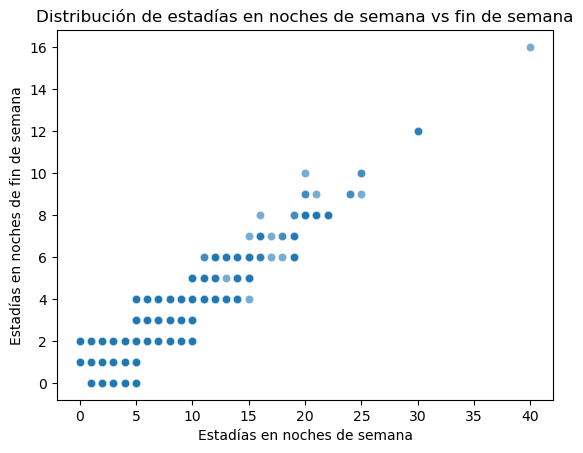

In [74]:
sns.scatterplot(data=hotel, x="stays_in_week_nights", y="stays_in_weekend_nights", alpha=0.6).set(title=r"Distribución de estadías en noches de semana vs fin de semana")
plt.xlabel('Estadías en noches de semana')
plt.ylabel('Estadías en noches de fin de semana')

plt.show()

Analizando el gráfico vemos que todos los registros están dentro de los valores esperados

Revisamos si los registros para comprobar si los valores de la variable is_repeated_guest son coherentes con los valores de previous_cancellations y previous_bookings_not_canceled. Es decir, si existen registros donde el huesped hizo una reserva anteriormente (haya sido cancelada o no) pero no esté registrado como huesped repetido o si, por otro lado, el huesped está registrado como repetido pero nunca hizo una reserva previamente (cancelada o no).

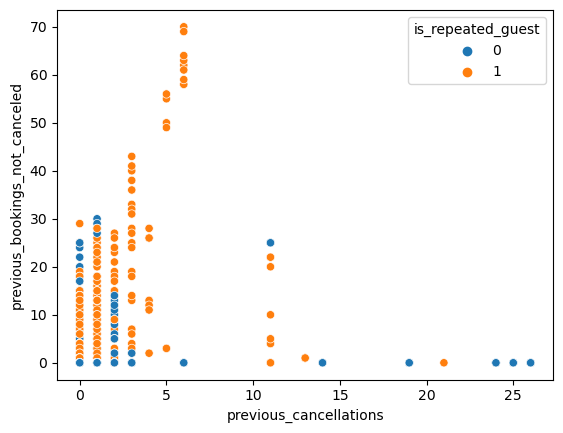

In [78]:
sns.scatterplot(hotel, x="previous_cancellations", y="previous_bookings_not_canceled", hue="is_repeated_guest")
plt.show()

Como se puede observar en el gráfico existen registros cuyos valores de is_repeated_guest y previous_cancellations o previous_bookings_not_canceled no son coherentes

In [88]:
hotel[(hotel["is_repeated_guest"] == 0) & ((hotel["previous_cancellations"] > 0) | (hotel["previous_bookings_not_canceled"]) > 0)][["is_repeated_guest", "previous_bookings_not_canceled", "previous_cancellations"]]

,is_repeated_guest,previous_bookings_not_canceled,previous_cancellations
7,0,0,1
16,0,0,1
22,0,0,1
31,0,0,1
41,0,0,1
...,...,...,...
61850,0,0,1
61869,0,0,1
61872,0,0,1
61901,0,0,1


In [89]:
hotel[(hotel["is_repeated_guest"] > 0) & ((hotel["previous_cancellations"] == 0) | (hotel["previous_bookings_not_canceled"]) == 0)][["is_repeated_guest", "previous_bookings_not_canceled", "previous_cancellations"]]

,is_repeated_guest,previous_bookings_not_canceled,previous_cancellations
266,1,0,1
387,1,0,1
801,1,0,1
1024,1,0,1
1203,1,0,1
...,...,...,...
61199,1,0,2
61334,1,0,1
61453,1,0,1
61829,1,0,1


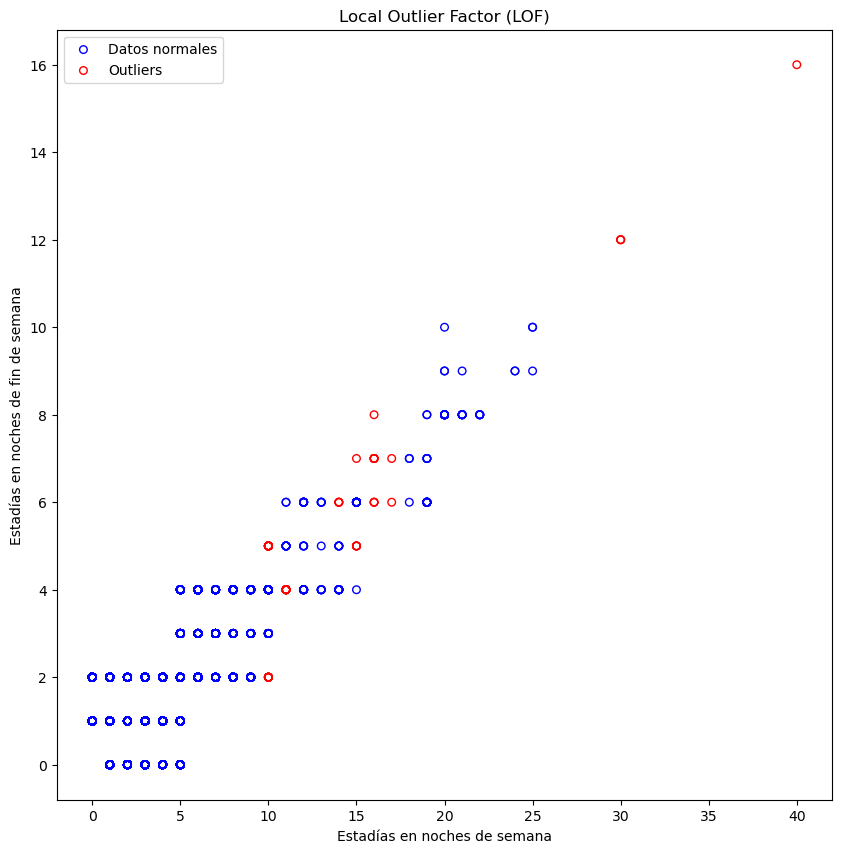

In [83]:
from sklearn.neighbors import LocalOutlierFactor

# Crear el conjunto de datos
hotel_lof = hotel[['stays_in_week_nights', 'stays_in_weekend_nights']].copy()

# Crear el clasificador LOF y hacer la predicción
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(hotel_lof.values)

# Guardar los scores
hotel_lof['scores'] = clf.negative_outlier_factor_

# Fijar el umbral para definir los outliers
umbral = -3

# Crear un dataframe con los datos normales y los outliers
df_normales = hotel_lof[hotel_lof['scores'] > umbral]
df_outliers = hotel_lof[hotel_lof['scores'] <= umbral]

# Crear el scatter plot con diferentes colores para los outliers y los datos normales
plt.figure(figsize=(10,10))
plt.scatter(df_normales['stays_in_week_nights'], df_normales['stays_in_weekend_nights'], edgecolor='blue', s=30, label='Datos normales', facecolors='none')
plt.scatter(df_outliers['stays_in_week_nights'], df_outliers['stays_in_weekend_nights'], edgecolor='red', s=30, label='Outliers', facecolors='none')
plt.title('Local Outlier Factor (LOF)')
plt.xlabel('Estadías en noches de semana')
plt.ylabel('Estadías en noches de fin de semana')
plt.legend()
plt.show()

In [84]:
print('Cantidad de outliers: ', df_outliers.shape[0])
print('Cantidad de datos normales: ', df_normales.shape[0])

Cantidad de outliers:  68
Cantidad de datos normales:  60784
